<a href="https://colab.research.google.com/github/HeadOutii/AIRepair/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow numpy pandas matplotlib opencv-python kaggle

# Новый раздел

In [ ]:
# Импорт библиотек
import kagglehub
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [ ]:
path = kagglehub.dataset_download("bharatadhikari/humanface8000")
print("Path to dataset files:", path)
image_folder = os.path.join(path, 'landscape Images/gray')
mask_folder = os.path.join(path, 'landscape Images/color')

Path to dataset files: /root/.cache/kagglehub/datasets/bharatadhikari/humanface8000/versions/1


# Новый раздел

In [ ]:
IMAGE_SIZE = (128, 128)
NUM_IMAGES = 8000
BATCH_SIZE = 64
EPOCHS = 100

In [ ]:
# ЗАгрузка изображений из папки
def load_images(folder, num_images, target_size):

    images = []
    for filename in os.listdir(folder)[:num_images]:
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, target_size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
    return np.array(images)

In [ ]:
# Загрузка набора данных
gray_images = load_images(os.path.join(image_folder), NUM_IMAGES, IMAGE_SIZE)
color_images = load_images(os.path.join(mask_folder), NUM_IMAGES, IMAGE_SIZE)

In [ ]:
# Нормализация
gray_images = gray_images.astype('float32') / 255.0
color_images = color_images.astype('float32') / 255.0

In [ ]:
# Разделение набора данных на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(gray_images, color_images, test_size=0.2, random_state=42)

In [ ]:
def create_model(input_shape):

    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.UpSampling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.UpSampling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')
    ])
    return model

model = create_model((IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Обучнений модели
history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test)
)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 172ms/step - loss: 0.0389 - val_loss: 0.0136
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - loss: 0.0122 - val_loss: 0.0101
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - loss: 0.0097 - val_loss: 0.0089
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - loss: 0.0086 - val_loss: 0.0081
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - loss: 0.0080 - val_loss: 0.0077
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - loss: 0.0075 - val_loss: 0.0073
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - loss: 0.0070 - val_loss: 0.0069
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - loss: 0.0065 - val_loss: 0.0068
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - loss: 0.0064 - val_loss: 0.0067
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - loss: 0.0062 - val_loss: 0.0066
Epoch 12

In [ ]:
# Сохранение модели
model.save('image_restoration_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


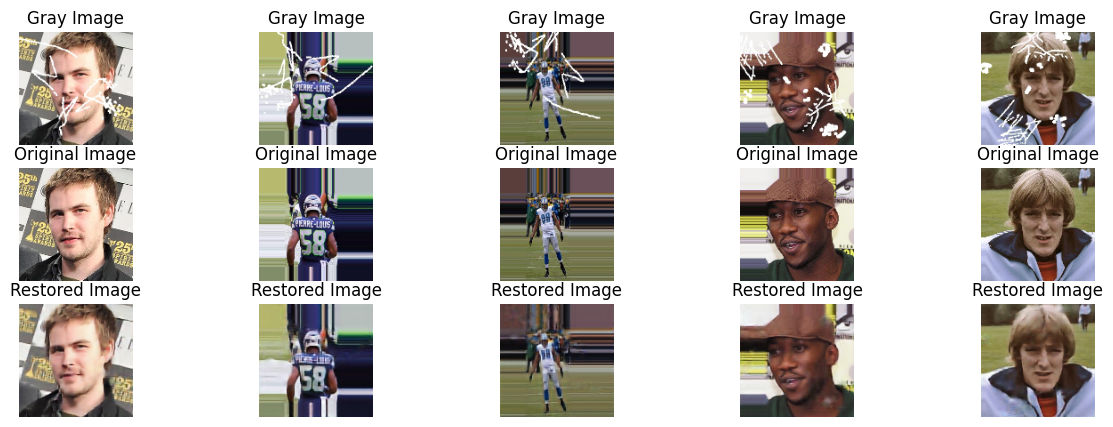

In [ ]:
# Визуализация
def visualize_results(X_test, y_test, model, num_images=5):

    preds = model.predict(X_test[:num_images])

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(3, num_images, i + 1)
        plt.imshow(X_test[i])
        plt.title("Поврежденное")
        plt.axis('off')

        plt.subplot(3, num_images, i + 1 + num_images)
        plt.imshow(y_test[i])
        plt.title("Оригинальное фото")
        plt.axis('off')

        plt.subplot(3, num_images, i + 1 + 2 * num_images)
        plt.imshow(preds[i])
        plt.title("Восстановленное")
        plt.axis('off')

    plt.show()

visualize_results(X_test, y_test, model)